<a href="https://colab.research.google.com/github/saiteja2001/custom-data-object-detection-using-yolov5/blob/main/yolov5_customdata_object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

cloning the yolov5 model

In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 10876, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 10876 (delta 0), reused 2 (delta 0), pack-reused 10873
Receiving objects: 100% (10876/10876), 10.98 MiB | 33.85 MiB/s, done.
Resolving deltas: 100% (7513/7513), done.


dataset downloading

In [ ]:
!curl -L "https://app.roboflow.com/ds/OSjIh9ojhu?key=6U1FsMd7X9" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   896  100   896    0     0   1882      0 --:--:-- --:--:-- --:--:--  1882
100 19.2M  100 19.2M    0     0  16.6M      0  0:00:01  0:00:01 --:--:-- 40.3M
Archive:  roboflow.zip
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/00dea1edf14f09ab_jpg.rf.d01e4ce2ae2ceeb681811e166628ebe3.jpg  
 extracting: test/images/00e481ea1a520175_jpg.rf.3aa265576584552d260f08286fada61c.jpg  
 extracting: test/images/08c8b73e0c2e296e_jpg.rf.397b5aed7159e45706274daee08abd1d.jpg  
 extracting: test/images/10c26c6598677a1f_jpg.rf.2da615ebe2ed4c7188acc8db5f7267bf.jpg  
 extracting: test/images/1ef77c61856d3b4b_jpg.rf.ba7d53c9ea62ba4dfa71f53238a3d0ac.jpg  
 extracting: test/images/259ff749ac781352_jpg.rf.0c731629aab5773c4ea1232deac318f4.jpg  
 extracting:

downloading requirements

In [ ]:
%cd yolov5/

/content/yolov5


In [ ]:
!pip install -r requirements.txt

     |████████████████████████████████| 596 kB 23.1 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


Training using the dataset by giving our data.yml file as input in the data column

In [ ]:
!python train.py --img 416 --batch 8 --epochs 50 --data /content/data.yaml --weights yolov5s.pt --nosave --cache 

train: weights=yolov5s.pt, cfg=, data=/content/data.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=50, batch_size=8, imgsz=416, rect=False, resume=False, nosave=True, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.0-255-gca0a007 torch 1.10.0+cu111 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0

running model on test images and printing logs and fps. ressult images are saved in yolov5/runs/detect/exp

In [ ]:
!python detect.py --weights /content/yolov5/runs/train/exp/weights/last.pt --img 416 --conf 0.4 --source /content/test/images

detect: weights=['/content/yolov5/runs/train/exp/weights/last.pt'], source=/content/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-255-gca0a007 torch 1.10.0+cu111 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model Summary: 213 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
image 1/63 /content/test/images/00dea1edf14f09ab_jpg.rf.d01e4ce2ae2ceeb681811e166628ebe3.jpg: 416x416 1 Large vehicles, Done. (0.014s)
image 2/63 /content/test/images/00e481ea1a520175_jpg.rf.3aa265576584552d260f08286fada61c.jpg: 416x416 3 Buss, Done. (0.014s)
image 3/63 /content/test/images/08c8b73e0c2e296e_jpg.rf.397b5aed7159e45706274daee08abd1d.jpg: 416x

displaying the result images.

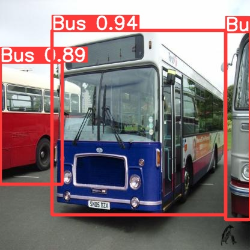

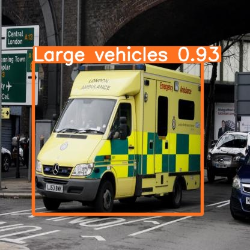

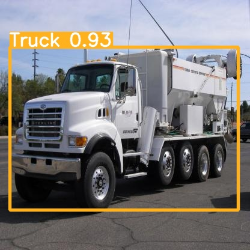

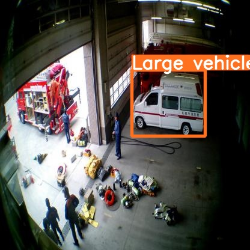

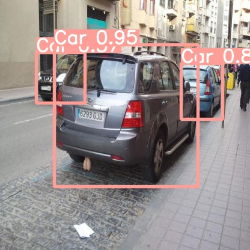

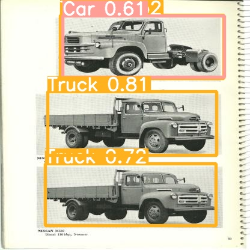

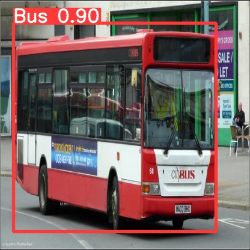

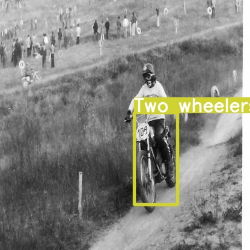

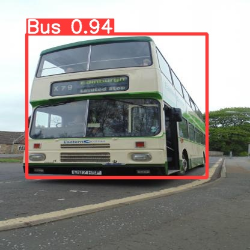

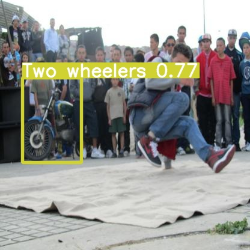

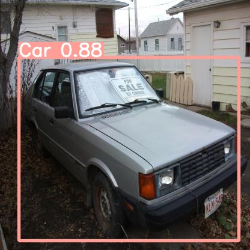

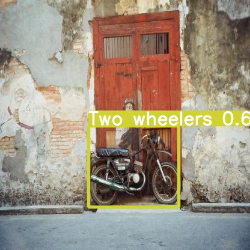

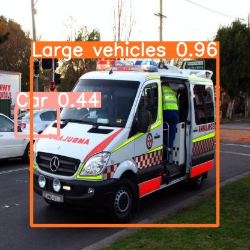

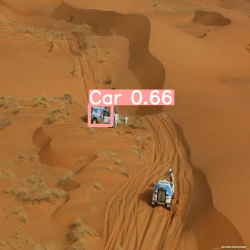

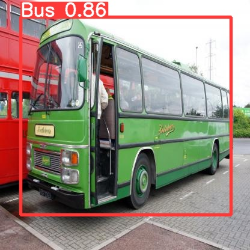

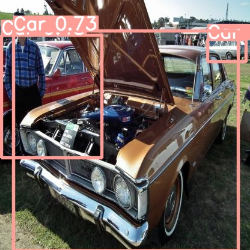

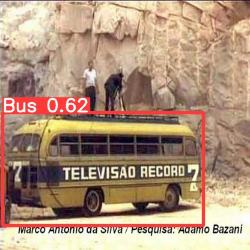

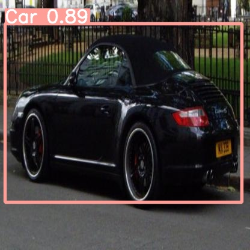

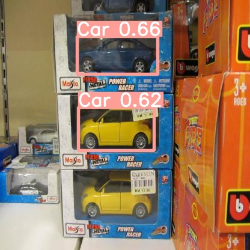

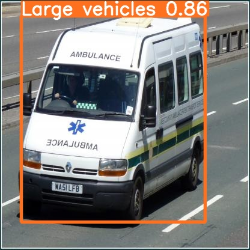

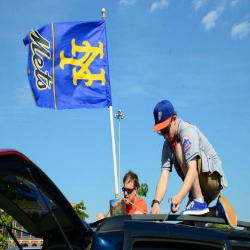

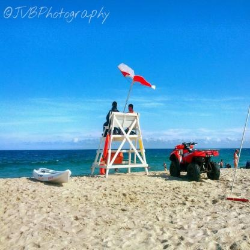

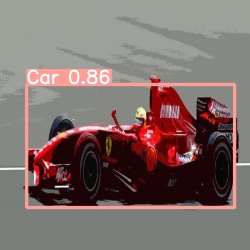

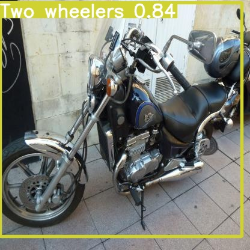

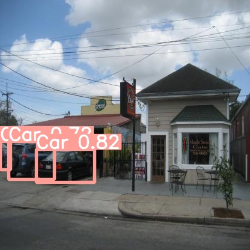

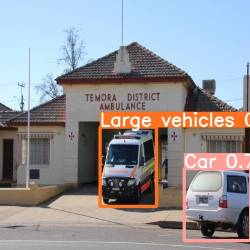

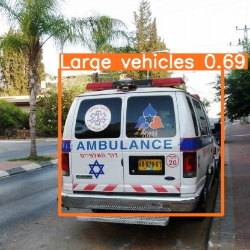

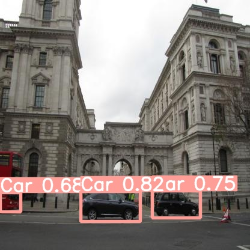

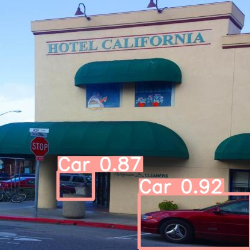

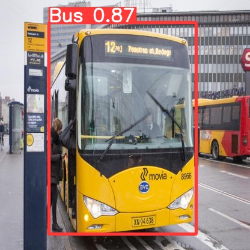

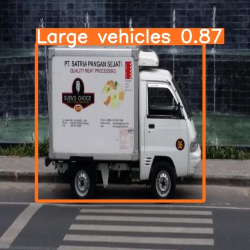

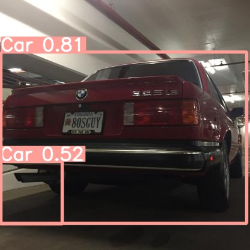

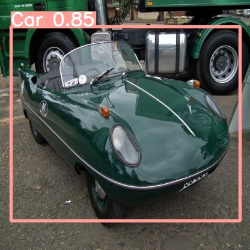

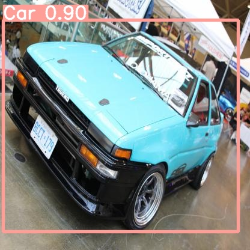

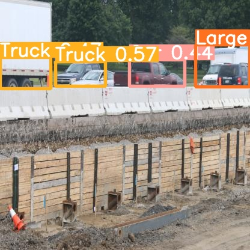

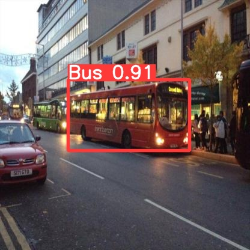

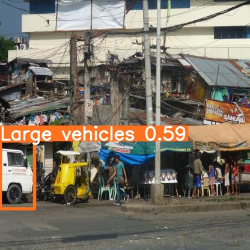

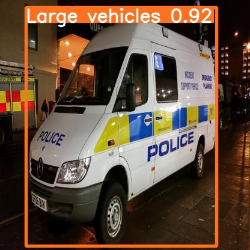

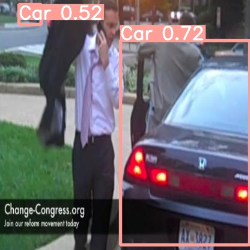

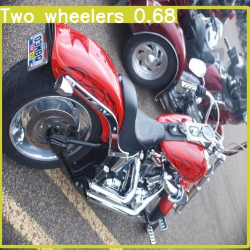

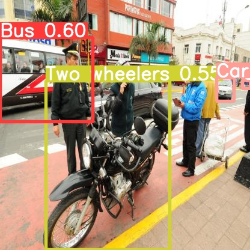

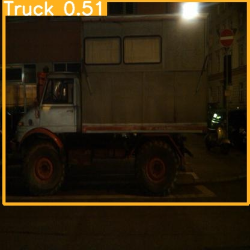

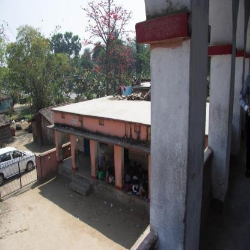

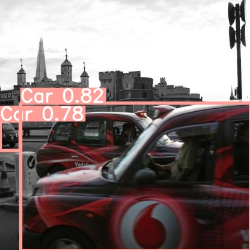

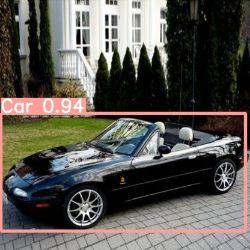

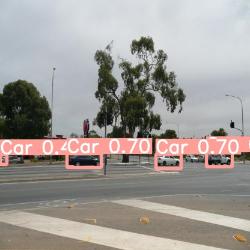

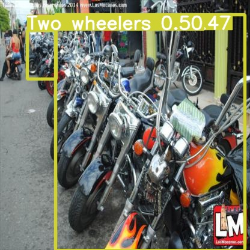

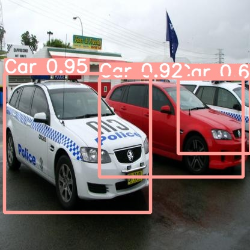

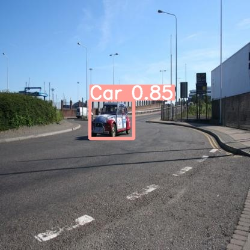

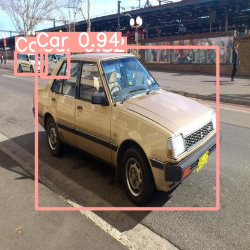

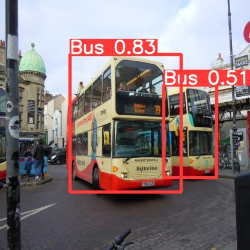

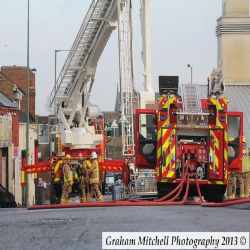

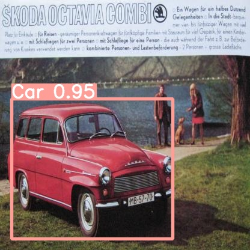

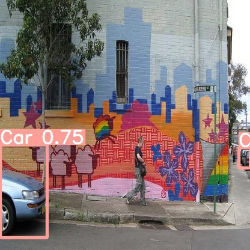

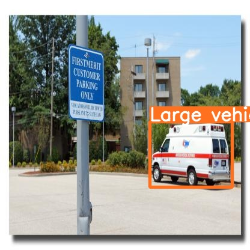

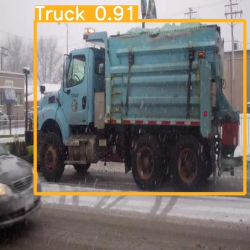

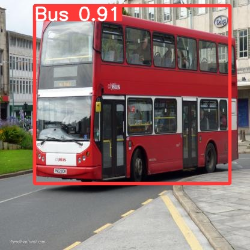

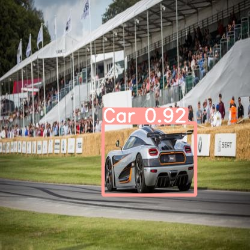

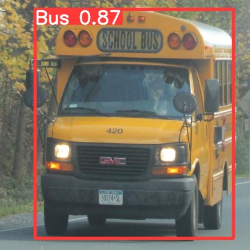

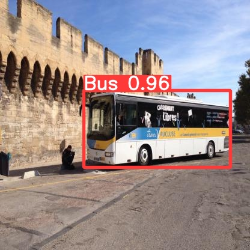

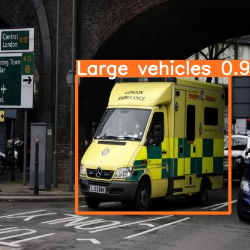

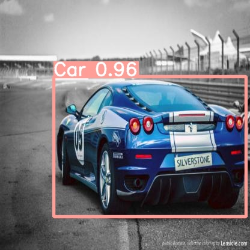

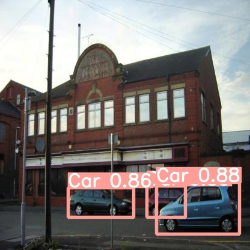

In [ ]:
path="/content/yolov5/runs/detect/exp"  #give the path of saved results like exp5,exp6...
from google.colab.patches import cv2_imshow
import os
import cv2

for i in os.listdir(path):
  k=path+"/"+i
  img = cv2.imread(k)
  img =cv2.resize(img,(250,250))
  cv2_imshow(img)


In [ ]:
!pip install gdown

moving out of yolov5 directory and downloading video file to test.

In [ ]:
%cd /content/

/content


In [ ]:
!gdown --id "1fwPTLeFLC4TNhOgaHItFN0Uv_yOwN9YT"

Downloading...
From: https://drive.google.com/uc?id=1fwPTLeFLC4TNhOgaHItFN0Uv_yOwN9YT
To: /content/video_fotage.mp4
100% 73.2M/73.2M [00:00<00:00, 246MB/s]


takes more time 

In [ ]:
!python detect.py --weights /content/yolov5/runs/train/exp/weights/last.pt --img 416 --conf 0.4 --source /content/video_fotage.mp4

Streaming output truncated to the last 5000 lines.
video 1/1 (4187/9184) /content/video_fotage.mp4: 256x416 5 Cars, Done. (0.010s)
video 1/1 (4188/9184) /content/video_fotage.mp4: 256x416 6 Cars, Done. (0.011s)
video 1/1 (4189/9184) /content/video_fotage.mp4: 256x416 6 Cars, Done. (0.010s)
video 1/1 (4190/9184) /content/video_fotage.mp4: 256x416 3 Cars, Done. (0.013s)
video 1/1 (4191/9184) /content/video_fotage.mp4: 256x416 4 Cars, Done. (0.010s)
video 1/1 (4192/9184) /content/video_fotage.mp4: 256x416 5 Cars, Done. (0.010s)
video 1/1 (4193/9184) /content/video_fotage.mp4: 256x416 4 Cars, Done. (0.010s)
video 1/1 (4194/9184) /content/video_fotage.mp4: 256x416 4 Cars, Done. (0.010s)
video 1/1 (4195/9184) /content/video_fotage.mp4: 256x416 5 Cars, Done. (0.011s)
video 1/1 (4196/9184) /content/video_fotage.mp4: 256x416 6 Cars, Done. (0.010s)
video 1/1 (4197/9184) /content/video_fotage.mp4: 256x416 3 Cars, Done. (0.011s)
video 1/1 (4198/9184) /content/video_fotage.mp4: 256x416 8 Cars, Done

result video will be placed in yolov5/runs/detect/exp....